# Principal Component Analysis with Cancer Data

In [61]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [62]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv") 


In [63]:
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [64]:
cancer_df.describe(). transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [65]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values, however Bare Nuceoli has missing values and hence needs to be removed.
  # Class would be the target variable. Should be removed when PCA is done

In [66]:
cancer_df.duplicated()
cancer_df.drop_duplicates(inplace = True)
cancer_df.shape

(691, 11)

In [67]:
#can_mod_df = cancer_df.drop('Class', axis=1)


In [68]:
#can_mod_df = can_mod_df.drop('ID', axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [69]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
ID                             691 non-null int64
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null object
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


In [70]:
cancer_df.shape

(691, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [71]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [72]:
cancer_df = cancer_df.replace('?', np.nan)

In [73]:
cancer_df_1 = cancer_df[cancer_df.isna().any(axis=1)]
cancer_df_1.count() # there are 16 records with nan in Bare Nuclei

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                     0
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [74]:
# No missing values found. So let us try to remove ? from bare nuclei column

cancer_df.dropna(inplace=True)

# Get count of rows having ?



In [75]:
cancer_df['Bare Nuclei'] = pd.to_numeric(cancer_df['Bare Nuclei'])

In [76]:
cancer_df.shape #checked that 16 are dropped as its 2%

(675, 11)

In [77]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [78]:
# Check for correlation of variable

In [79]:
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.060331,-0.043090,-0.042835,-0.071102,-0.050839,-0.098028,-0.061571,-0.052705,-0.039134,-0.083987
ClumpThickness,-0.060331,1.000000,0.640847,0.652617,0.489421,0.519172,0.593936,0.556404,0.533891,0.351270,0.715714
Cell Size,-0.043090,0.640847,1.000000,0.905755,0.714650,0.748829,0.689895,0.759418,0.723712,0.462185,0.820663
Cell Shape,-0.042835,0.652617,0.905755,1.000000,0.694029,0.717186,0.710876,0.737873,0.723241,0.443013,0.820688
Marginal Adhesion,-0.071102,0.489421,0.714650,0.694029,1.000000,0.603479,0.676428,0.671744,0.602188,0.418393,0.710985
Single Epithelial Cell Size,-0.050839,0.519172,0.748829,0.717186,0.603479,1.000000,0.582752,0.622649,0.634129,0.484212,0.689544
Bare Nuclei,-0.098028,0.593936,0.689895,0.710876,0.676428,0.582752,1.000000,0.679137,0.587950,0.339792,0.820533
Normal Nucleoli,-0.061571,0.556404,0.759418,0.737873,0.671744,0.622649,0.679137,1.000000,0.668820,0.345681,0.758252
Bland Chromatin,-0.052705,0.533891,0.723712,0.723241,0.602188,0.634129,0.587950,0.668820,1.000000,0.433039,0.722020
Mitoses,-0.039134,0.351270,0.462185,0.443013,0.418393,0.484212,0.339792,0.345681,0.433039,1.000000,0.424399


In [80]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [81]:
#Let us check for pair plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


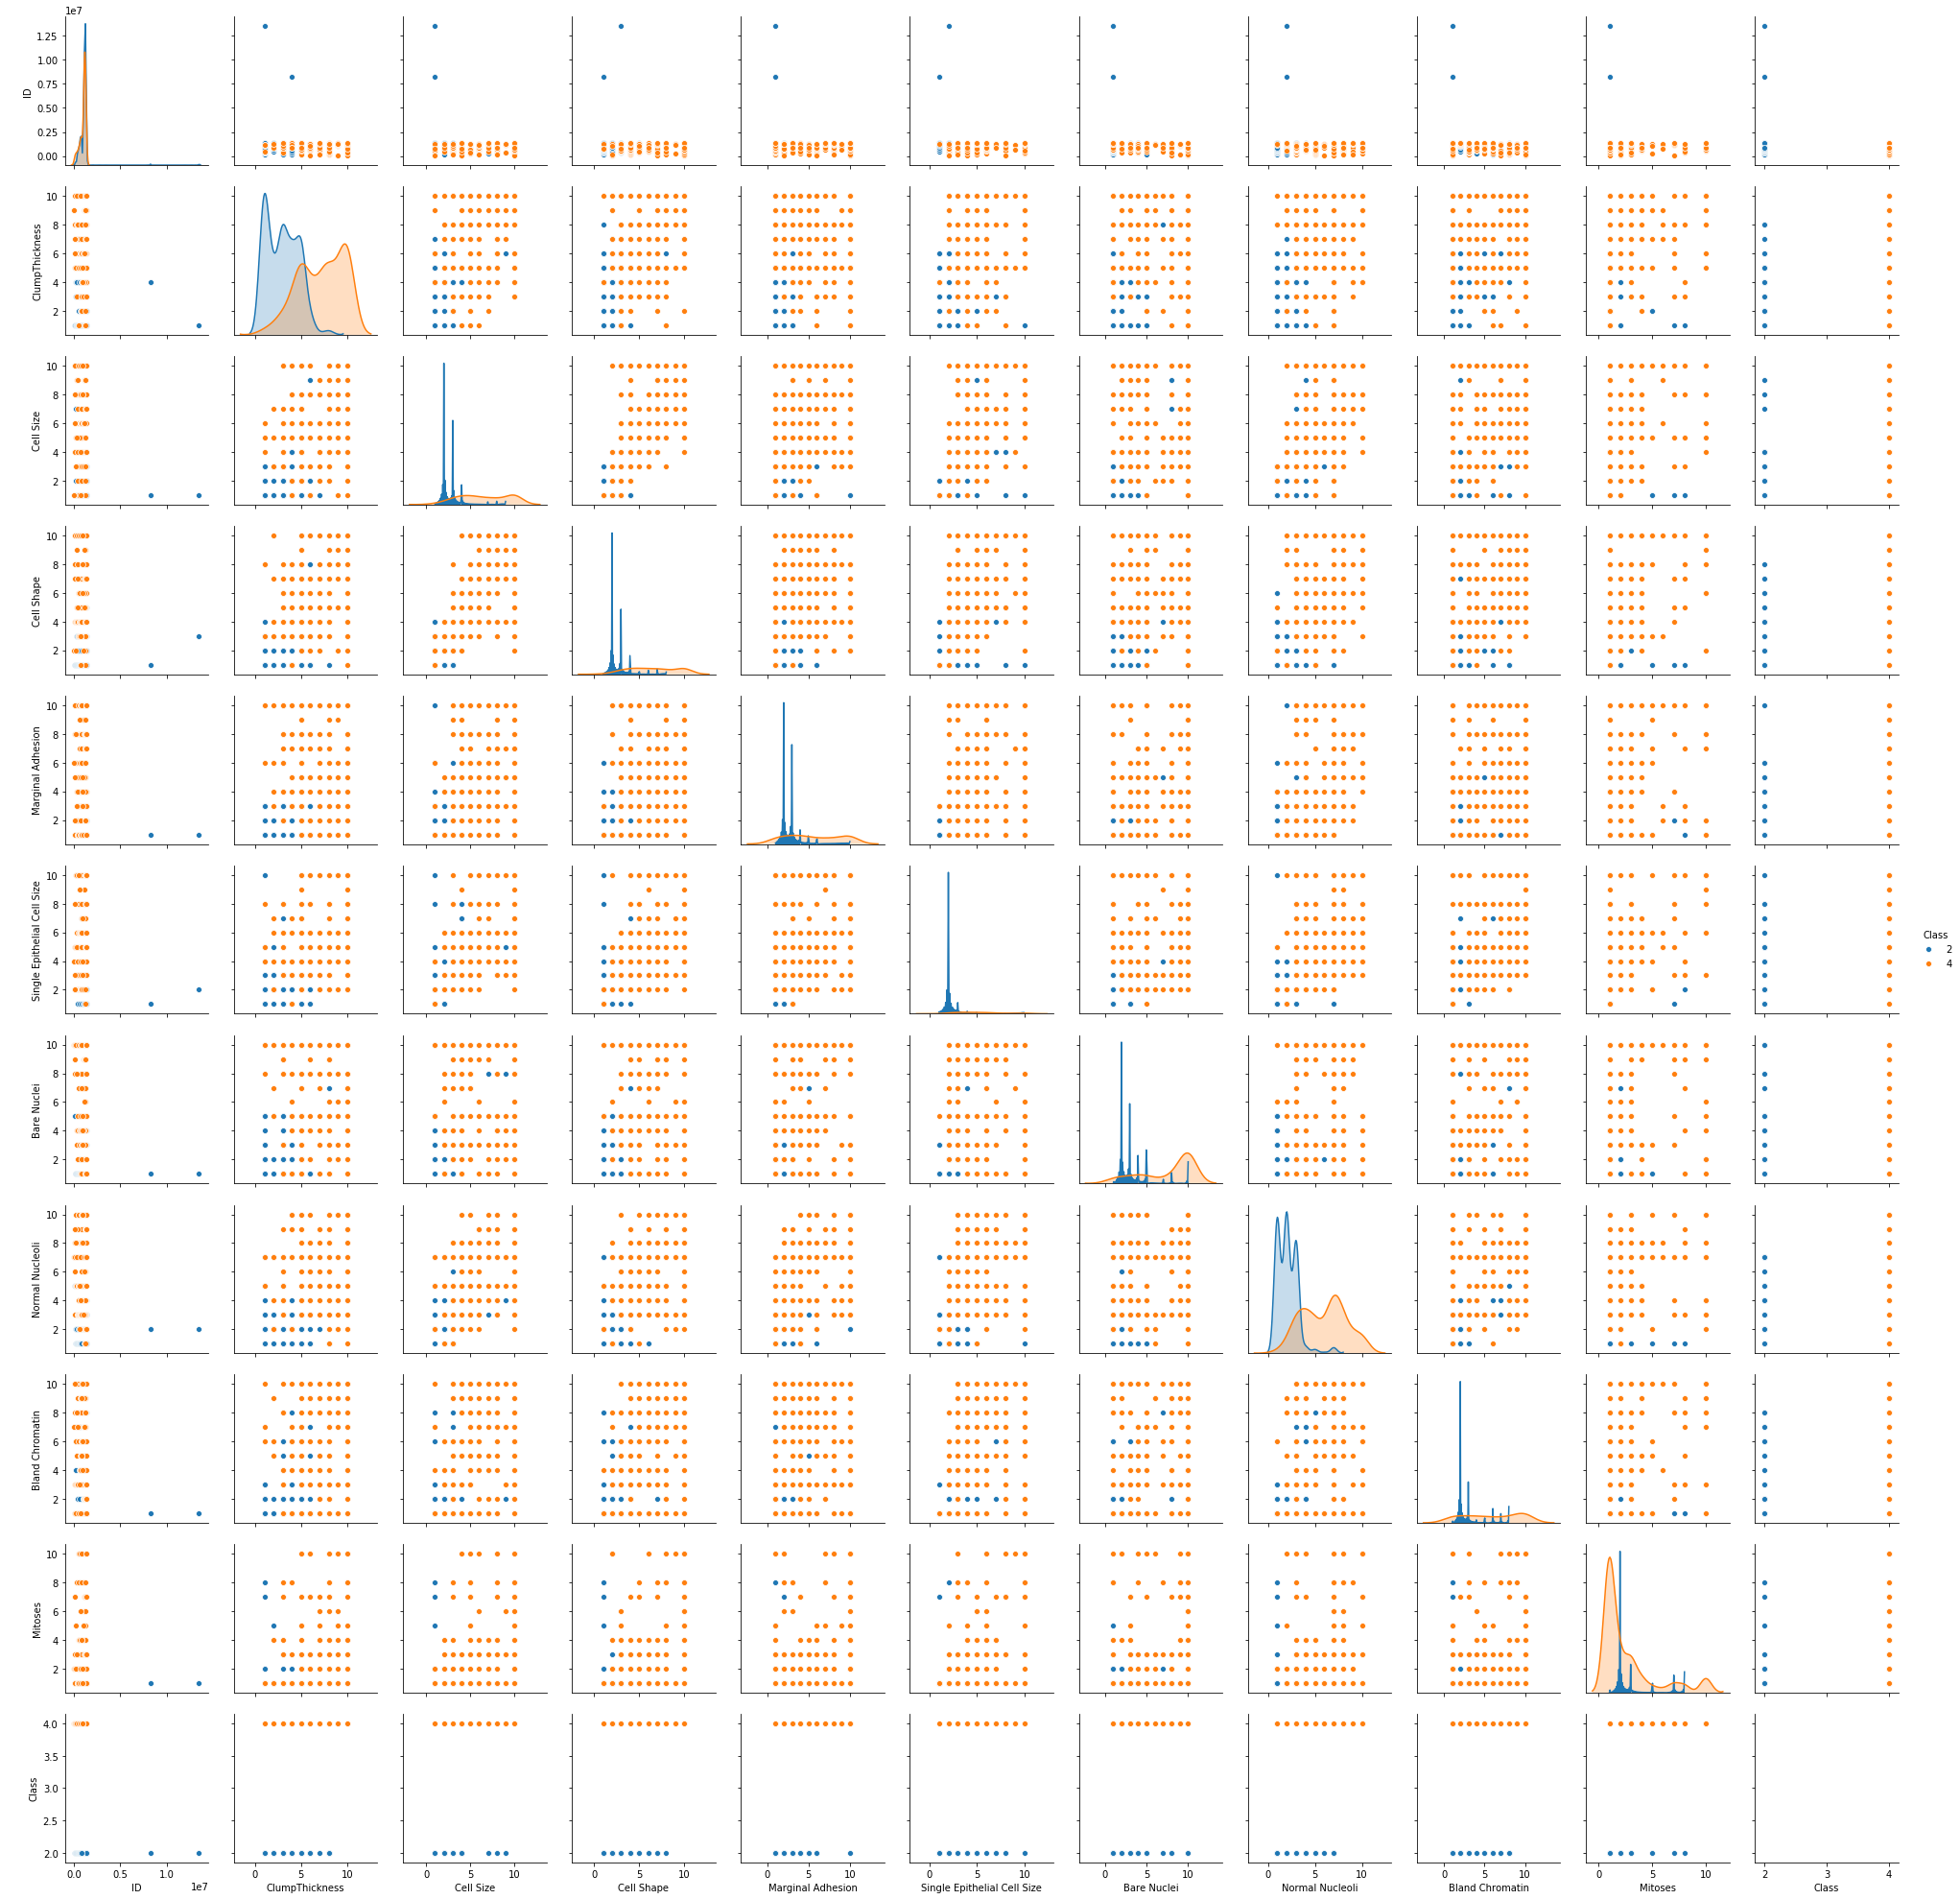

In [82]:
sns.pairplot(cancer_df, hue='Class',diag_kind ='kde') 

In [83]:
# Relationship between variables shows some good correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [84]:
# We could see most of the outliers are now removed.

In [85]:
cancer_df.drop('Class', axis=1, inplace = True) # remove as its categorical and will interfere

In [86]:
cancer_df.drop('ID', axis=1, inplace = True) # remove as its unnecessary

In [87]:
#remove outliers

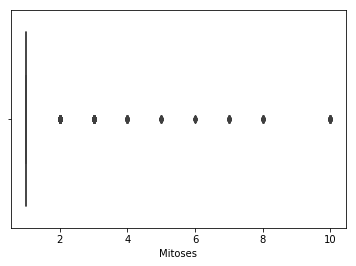

In [88]:
sns.boxplot(x=cancer_df['Mitoses']) 
# no outliers in ClumpThickness, Cell Size,Cell Shape
# columns with Outlier Marginal Adhension,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses 

In [89]:
cancer_df['Outlier'] = False

In [90]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 675 non-null int64
Cell Size                      675 non-null int64
Cell Shape                     675 non-null int64
Marginal Adhesion              675 non-null int64
Single Epithelial Cell Size    675 non-null int64
Bare Nuclei                    675 non-null int64
Normal Nucleoli                675 non-null int64
Bland Chromatin                675 non-null int64
Mitoses                        675 non-null int64
Outlier                        675 non-null bool
dtypes: bool(1), int64(9)
memory usage: 73.4 KB


In [91]:
# define a function which marks the outliers for any column as "True"  , 
# and returns the count of outliers rows for the column
def mark_outlier_row_from_Column(xdf,column_name):
    count = 0
    q1 = xdf[column_name].quantile(0.25)
    q3 = xdf[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    print(lower_bound)
    print(upper_bound)
    for i in range(0,len(xdf)):
        if xdf[column_name][i] < lower_bound:            
            xdf['Outlier'][i] = True
            count = count + 1
        if xdf[column_name][i] > upper_bound:            
            count = count + 1
            xdf['Outlier'][i] = True
    return(column_name, count)



In [92]:
cancer_df.head(24)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Outlier
0,5,1,1,1,2,1,3,1,1,False
1,5,4,4,5,7,10,3,2,1,False
2,3,1,1,1,2,2,3,1,1,False
3,6,8,8,1,3,4,3,7,1,False
4,4,1,1,3,2,1,3,1,1,False
5,8,10,10,8,7,10,9,7,1,False
6,1,1,1,1,2,10,3,1,1,False
7,2,1,2,1,2,1,3,1,1,False
8,2,1,1,1,2,1,1,1,5,False
9,4,2,1,1,2,1,2,1,1,False


In [93]:

print(mark_outlier_row_from_Column(cancer_df,'Normal Nucleoli'))

-2.5
9.5


KeyError: 23

In [94]:
cancer_df.drop('Outlier', axis = 1)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [95]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


cancer_df_std = sc.fit_transform(cancer_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [96]:
# PCA
# Step 1 - Create covariance matrix


In [97]:
cov_matrix = np.cov(cancer_df_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00148368 0.64179757 0.6535854  0.49014737 0.51994192 0.59481694
  0.55722956 0.53468337 0.35179132 0.        ]
 [0.64179757 1.00148368 0.9070993  0.71571019 0.7499397  0.69091892
  0.76054465 0.72478554 0.46287028 0.        ]
 [0.6535854  0.9070993  1.00148368 0.69505865 0.71825054 0.71193067
  0.73896771 0.72431427 0.44367028 0.        ]
 [0.49014737 0.71571019 0.69505865 1.00148368 0.60437455 0.67743141
  0.67274039 0.60308103 0.41901379 0.        ]
 [0.51994192 0.7499397  0.71825054 0.60437455 1.00148368 0.58361701
  0.62357253 0.6350697  0.4849303  0.        ]
 [0.59481694 0.69091892 0.71193067 0.67743141 0.58361701 1.00148368
  0.68014431 0.58882248 0.34029648 0.        ]
 [0.55722956 0.76054465 0.73896771 0.67274039 0.62357253 0.68014431
  1.00148368 0.66981274 0.34619368 0.        ]
 [0.53468337 0.72478554 0.72431427 0.60308103 0.6350697  0.58882248
  0.66981274 1.00148368 0.43368123 0.        ]
 [0.35179132 0.46287028 0.44367028 0.41901379 0.4849303  0

# Q7 Identify eigen values and eigen vector

In [98]:
# Step 2- Get eigen values and eigen vector

In [99]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30129202  0.14382106 -0.87456587 -0.00397982 -0.0422162   0.01765212
  -0.27456474 -0.17685689  0.12206293  0.        ]
 [-0.38047894  0.04530412  0.03820758 -0.73413297  0.187475   -0.1383224
   0.43174719 -0.26065752 -0.06437646  0.        ]
 [-0.37721535  0.08032574 -0.01879307  0.66652232  0.1647692  -0.09050931
   0.58175214 -0.18009963 -0.02095043  0.        ]
 [-0.33424356  0.05792885  0.38087816  0.04499803 -0.51017646 -0.02771199
  -0.24523402 -0.44650274  0.46613314  0.        ]
 [-0.33574224 -0.17428826  0.13741306  0.06555505  0.37847261 -0.68074099
  -0.39574476  0.25535452  0.07246576  0.        ]
 [-0.33444941  0.26083232 -0.02540712 -0.07399867 -0.51594288 -0.04672706
   0.18973227  0.71329136 -0.02872983  0.        ]
 [-0.34620359  0.22791437  0.19876053  0.06603364  0.00423114  0.23600622
  -0.3625948  -0.14732488 -0.75857463  0.        ]
 [-0.336225   -0.02954431  0.1366274  -0.02359043  0.45074714  0.65585696
  -0.11078206  0.26956903  0.38548

# Q8 Find variance and cumulative variance by each eigen vector

In [100]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Variance Explained", var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Variance Explained [65.67315366792458, 8.632848418688885, 5.999599895775437, 5.093049837463266, 4.120188362974, 3.3343126685202353, 3.2425931542482966, 2.906028249100287, 0.9982257453050241, 0.0]
Cumulative Variance Explained [ 65.67315367  74.30600209  80.30560198  85.39865182  89.51884018
  92.85315285  96.09574601  99.00177425 100.         100.        ]


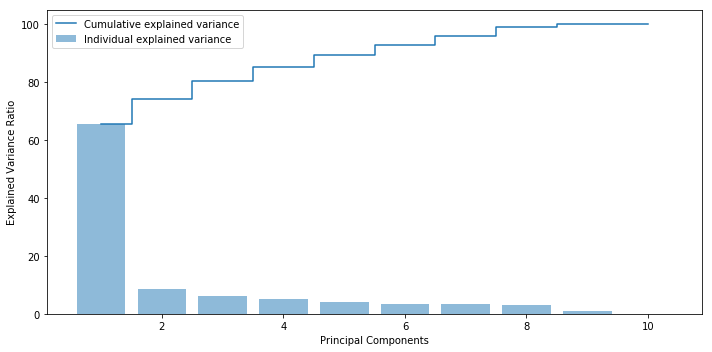

In [101]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [102]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform((cancer_df_std))
print(scikit_pca.components_)

[[ 0.30129202  0.38047894  0.37721535  0.33424356  0.33574224  0.33444941
   0.34620359  0.336225    0.23014187 -0.        ]
 [-0.14382106 -0.04530412 -0.08032574 -0.05792885  0.17428826 -0.26083232
  -0.22791437  0.02954431  0.90345301  0.        ]]


In [103]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=683, random_state=123)

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 675 but corresponding boolean dimension is 683

<Figure size 576x432 with 0 Axes>

# Q10 Find correlation between components and features

In [105]:
scikit_pca.components_

array([[ 0.30129202,  0.38047894,  0.37721535,  0.33424356,  0.33574224,
         0.33444941,  0.34620359,  0.336225  ,  0.23014187, -0.        ],
       [-0.14382106, -0.04530412, -0.08032574, -0.05792885,  0.17428826,
        -0.26083232, -0.22791437,  0.02954431,  0.90345301,  0.        ]])

In [106]:
print(scikit_pca.explained_variance_)

[5.91935324 0.77810911]


# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [107]:
j_df = pd.read_csv("jokes.csv")

In [108]:
j_df.shape

(24983, 101)

# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [109]:
ratings = j_df.iloc[0:200, 1:101]

ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [110]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [111]:
ratings.replace(99.00,0)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


ratings_diff = sc.fit_transform(ratings)

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [113]:
ratings_mean = ratings.mean(axis =0).sort_values(ascending = False)
ratings_mean.head(10)

Joke89    68.26785
Joke75    68.16485
Joke77    68.03305
Joke76    67.99045
Joke72    67.94600
Joke80    67.89735
Joke73    67.68100
Joke79    67.09945
Joke78    67.05365
Joke74    66.91115
dtype: float64